# Exploratory Data Analysis (EDA)

In [26]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
dataPath = "../data/processed/rhm_household_power_consumption.csv"

dataset = pd.read_csv(dataPath, index_col=0, parse_dates=True)
dataset.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,unmeasured,day_of_week,is_weekend,is_holiday,season,time_of_day
Datetime,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,52.992593,5,1,0,3,2
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,36.953333,5,1,0,3,3
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,38.553889,5,1,0,3,3
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,37.692778,5,1,0,3,3
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,33.307778,5,1,0,3,3


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34168 non-null  float64
 1   Global_reactive_power  34168 non-null  float64
 2   Voltage                34168 non-null  float64
 3   Global_intensity       34168 non-null  float64
 4   Sub_metering_1         34168 non-null  float64
 5   Sub_metering_2         34168 non-null  float64
 6   Sub_metering_3         34168 non-null  float64
 7   unmeasured             34168 non-null  float64
 8   day_of_week            34589 non-null  int64  
 9   is_weekend             34589 non-null  int64  
 10  is_holiday             34589 non-null  int64  
 11  season                 34589 non-null  int64  
 12  time_of_day            34589 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.7 MB


### Summary Statistics

In [29]:
def detailed_summary(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary

detailed_summary(dataset)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Global_active_power,34168.0,1.091728,0.897619,0.124000,0.341925,0.802850,1.579342,6.560533,1.297565,1.761955
Global_reactive_power,34168.0,0.123727,0.066851,0.000000,0.078000,0.106917,0.149433,0.774333,1.873608,5.390858
Voltage,34168.0,240.839393,3.001093,225.834500,239.180667,240.977833,242.695000,251.902000,-0.323136,0.864214
Global_intensity,34168.0,4.628238,3.757797,0.503333,1.513333,3.423333,6.606667,28.383333,1.350666,2.022901
Sub_metering_1,34168.0,1.121631,3.538046,0.000000,0.000000,0.000000,0.000000,48.366667,4.259900,24.587788
Sub_metering_2,34168.0,1.298566,4.192874,0.000000,0.000000,0.333333,0.650000,46.433333,5.270892,30.148442
Sub_metering_3,34168.0,6.458882,7.351219,0.000000,0.650000,1.650000,14.216667,21.550000,0.711388,-1.223314
unmeasured,34168.0,9.316381,8.273462,1.379444,4.356667,5.754444,11.113056,64.837222,2.041699,4.366863
day_of_week,34589.0,2.998959,2.000072,0.000000,1.000000,3.000000,5.000000,6.000000,0.001063,-1.249691
is_weekend,34589.0,0.285380,0.451602,0.000000,0.000000,0.000000,1.000000,1.000000,0.950540,-1.096538


#### Interpretación:

* `Global_active_power`: Tiene un promedio de 1.09 kW, con una desviación estándar de 1.06 kW, esto indica que hay gran variabilidad en el consumo energético, Su distribución es asimétrica con un skewness positivo, lo que quiere decir que es asimétrica hacia la derecha.
* `Global_reacive_power`: Tiene un promedio de 0.124 kW y una desviación estándar de 0.113 kW. Esto sugiere que, aunque el nivel general de potencia reactiva es bajo, existe una considerable variabilidad en su comportamiento a lo largo del tiempo, Su distribución presenta una asimetría hacia la derecha, con un valor de skewness de 1.26.
* `Voltage`: Tiene un promedio de 240.0 V y una desviación estándar de 4.0 V, lo que indica una estabilidad en el suministro de voltaje, su distribución es asimétrica hacia la izquierda, aunque es muy leve dicha asimetría.
* `Global_intensity`: Tiene un promedio de 4.5 A y una desviación estándar de 2.0 A, lo que sugiere una fluctuación moderada en la intensidad global de la corriente, su distribución tiene una asimetría hacia la derecha, con un skewness de 1.85.
* `Sub_metering_1`: Tiene un promedio de 1.12 Wh y una desviación estándar de 6.15 Wh, lo que indica un consumo muy variable en este submedidor, su distribución es asimétrica hacia la derecha, con un skewness de 5.944.
* `Sub_metering_2`: Tiene un promedio de 1.30 Wh y una desviación estándar de 5.82 Wh, lo que sugiere un consumo relativamente bajo y alta variabilidad en este submedidor, su distribución presenta una asimetría hacia la derecha, con un skewness de 4.321.
* `Sub_metering_3`: Tiene un promedio de 6.46 Wh y una desviación estándar de 8.44 Wh, lo que indica un consumo significativamente variable en este submedidor, su distribución es asimétrica hacia la derecha, aunque es leve, con un skewness de 0.725
* `Unmeasured`: Tiene un promedio de 9.31 Wh y una desviación estándar de 9.59 Wh, lo que indica alta variabilidad en esteconsumo.

### Correlation Matrix

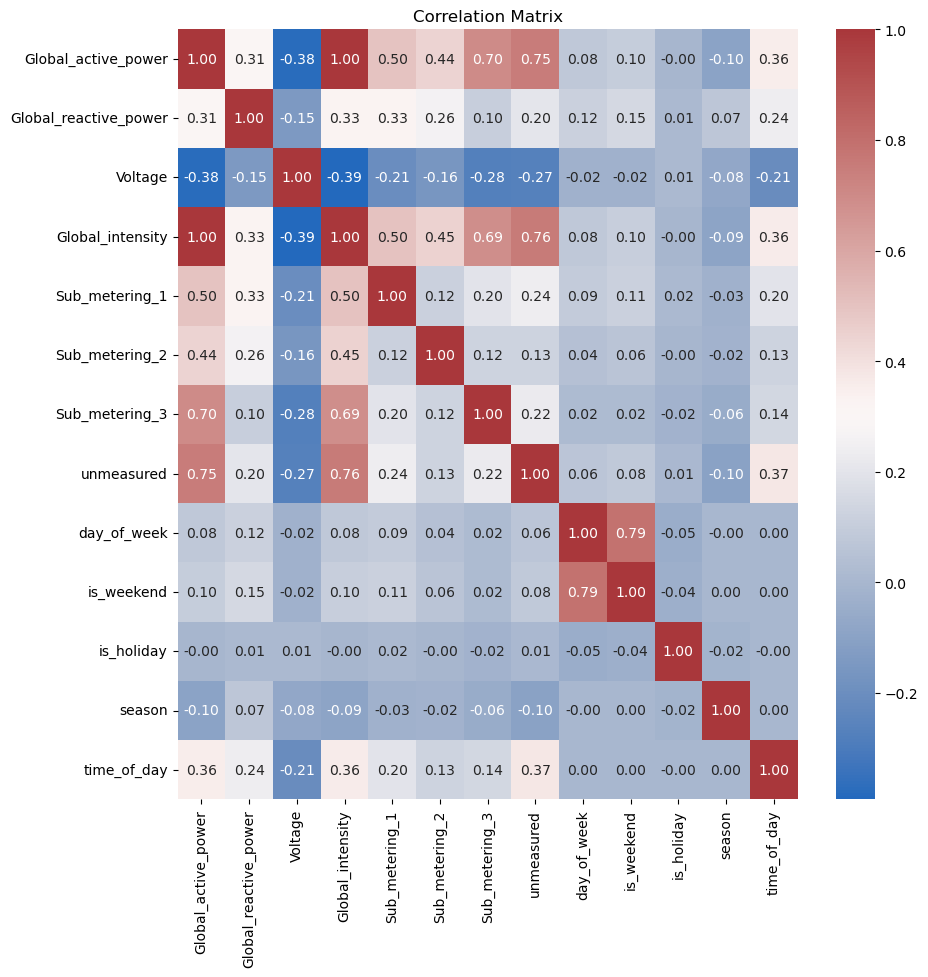

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(method='pearson'),
            annot=True,
            cmap="vlag",
            fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Variable distributions

The following plots show the distribution of each variable

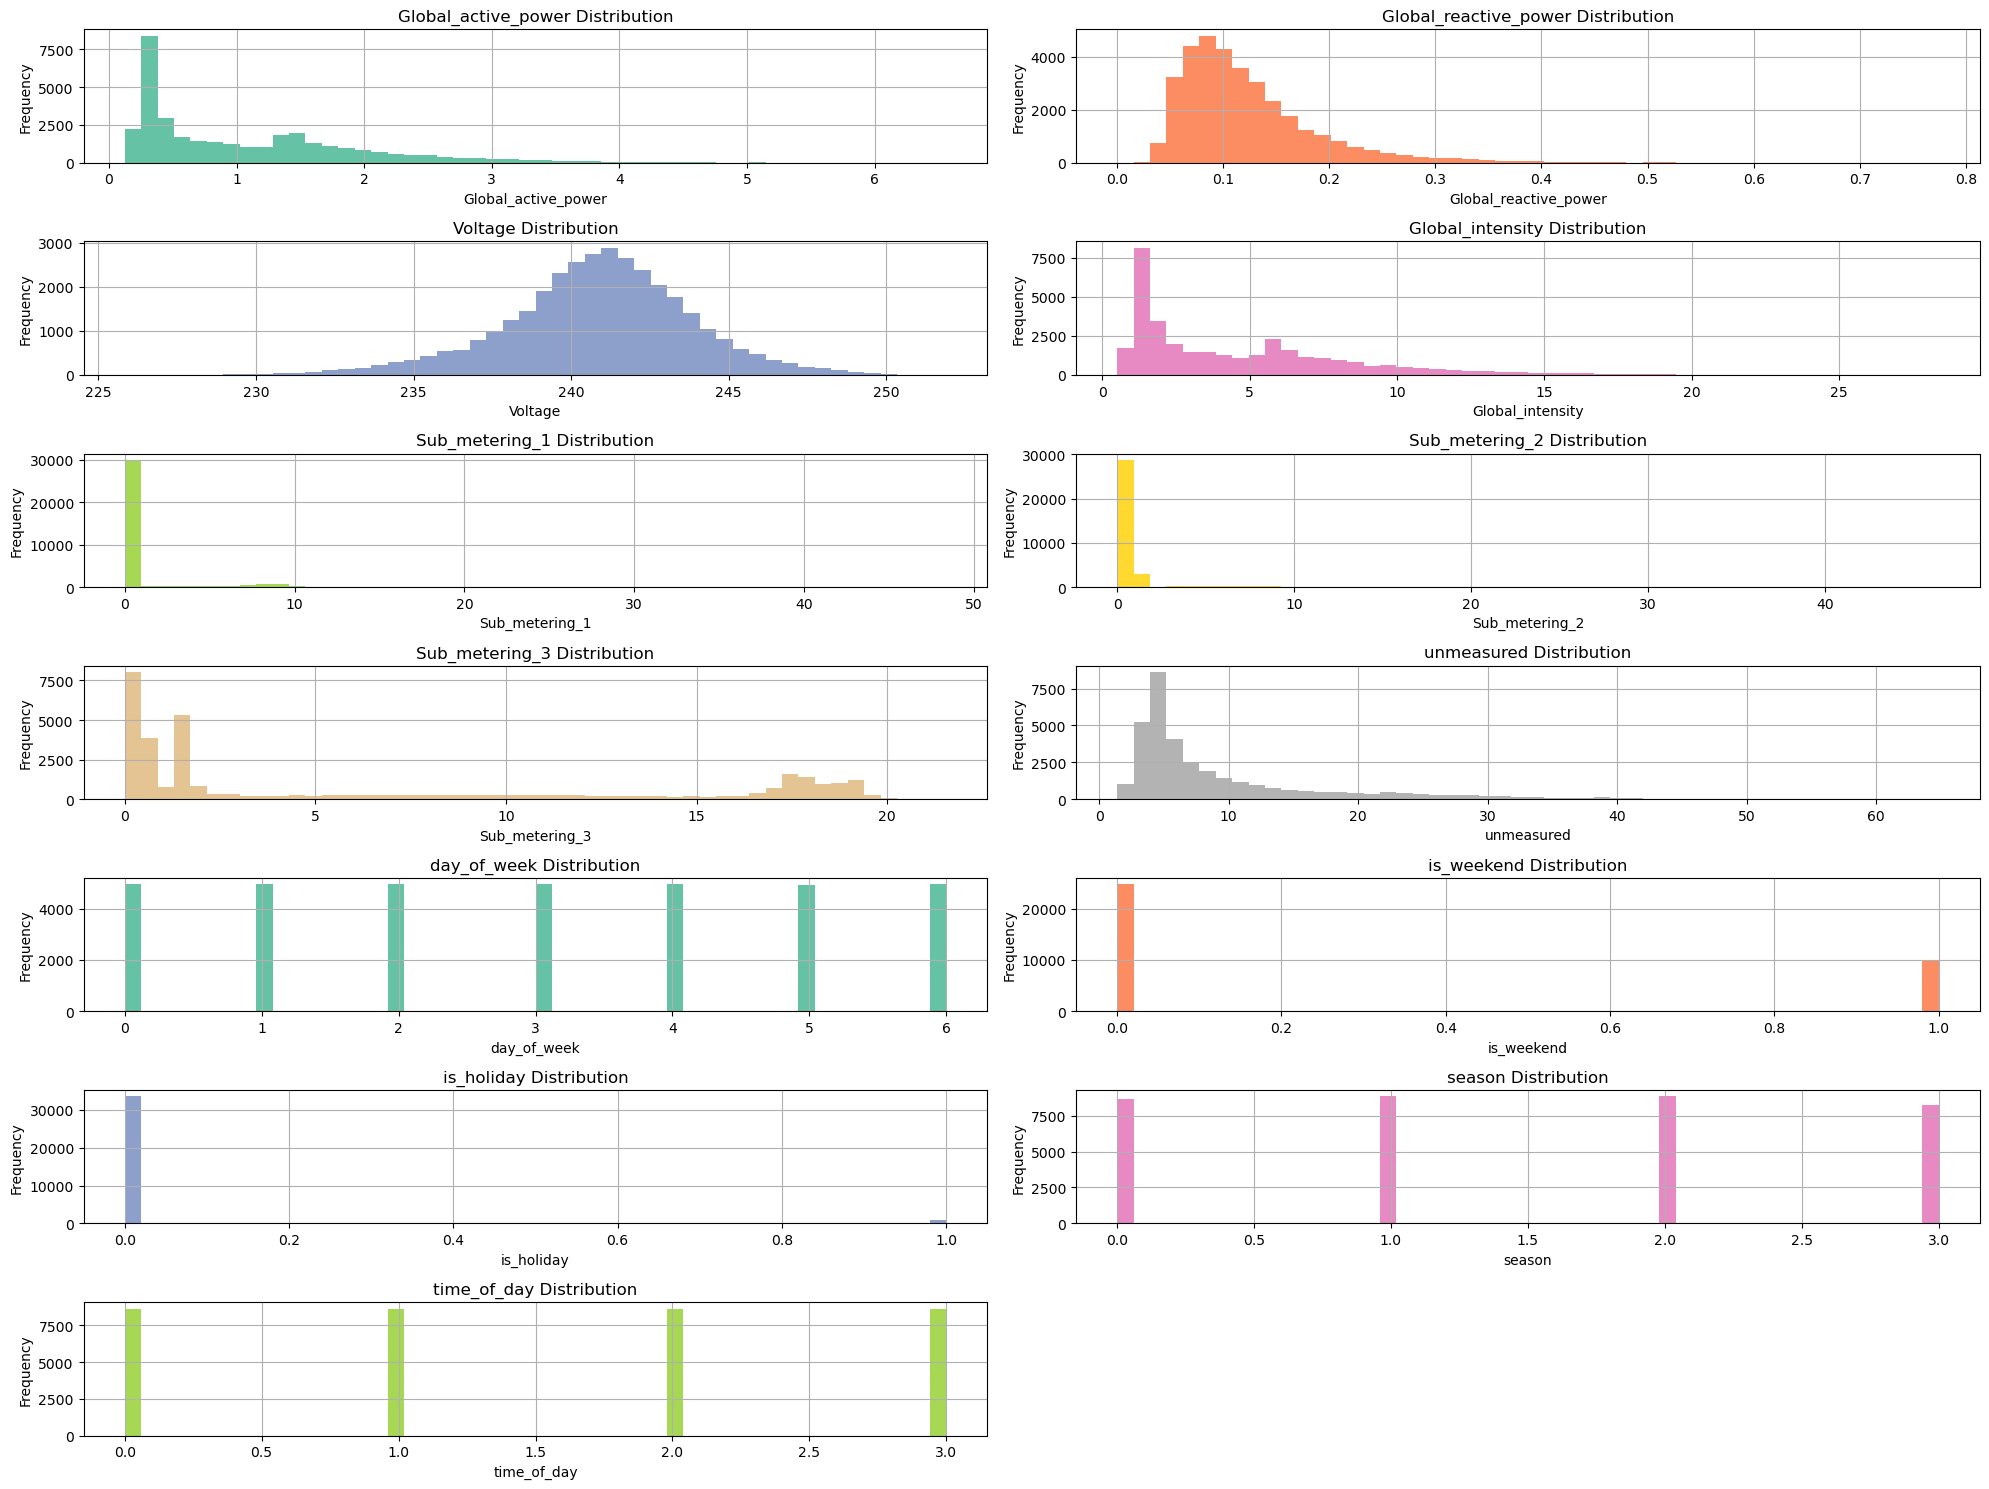

In [31]:
colors = sns.color_palette("Set2", len(dataset.columns))

plots_per_row = 2

num_rows = len(dataset.columns) // plots_per_row + (len(dataset.columns) % plots_per_row > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, 15))

axes = axes.flatten()

for i, (col, color) in enumerate(zip(dataset.columns, colors)):
    dataset[col].hist(bins=50, ax=axes[i], color=color)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Resampling Dataset

In [32]:
dtemp_rhm = dataset.resample('H').mean()     # resample by hour with mean
dtemp_rdm = dataset.resample('D').mean()     # resample by day with mean
dtemp_rwm = dataset.resample('W').mean()     # resample by week with mean
dtemp_rmm = dataset.resample('M').mean()     # resample by month with mean

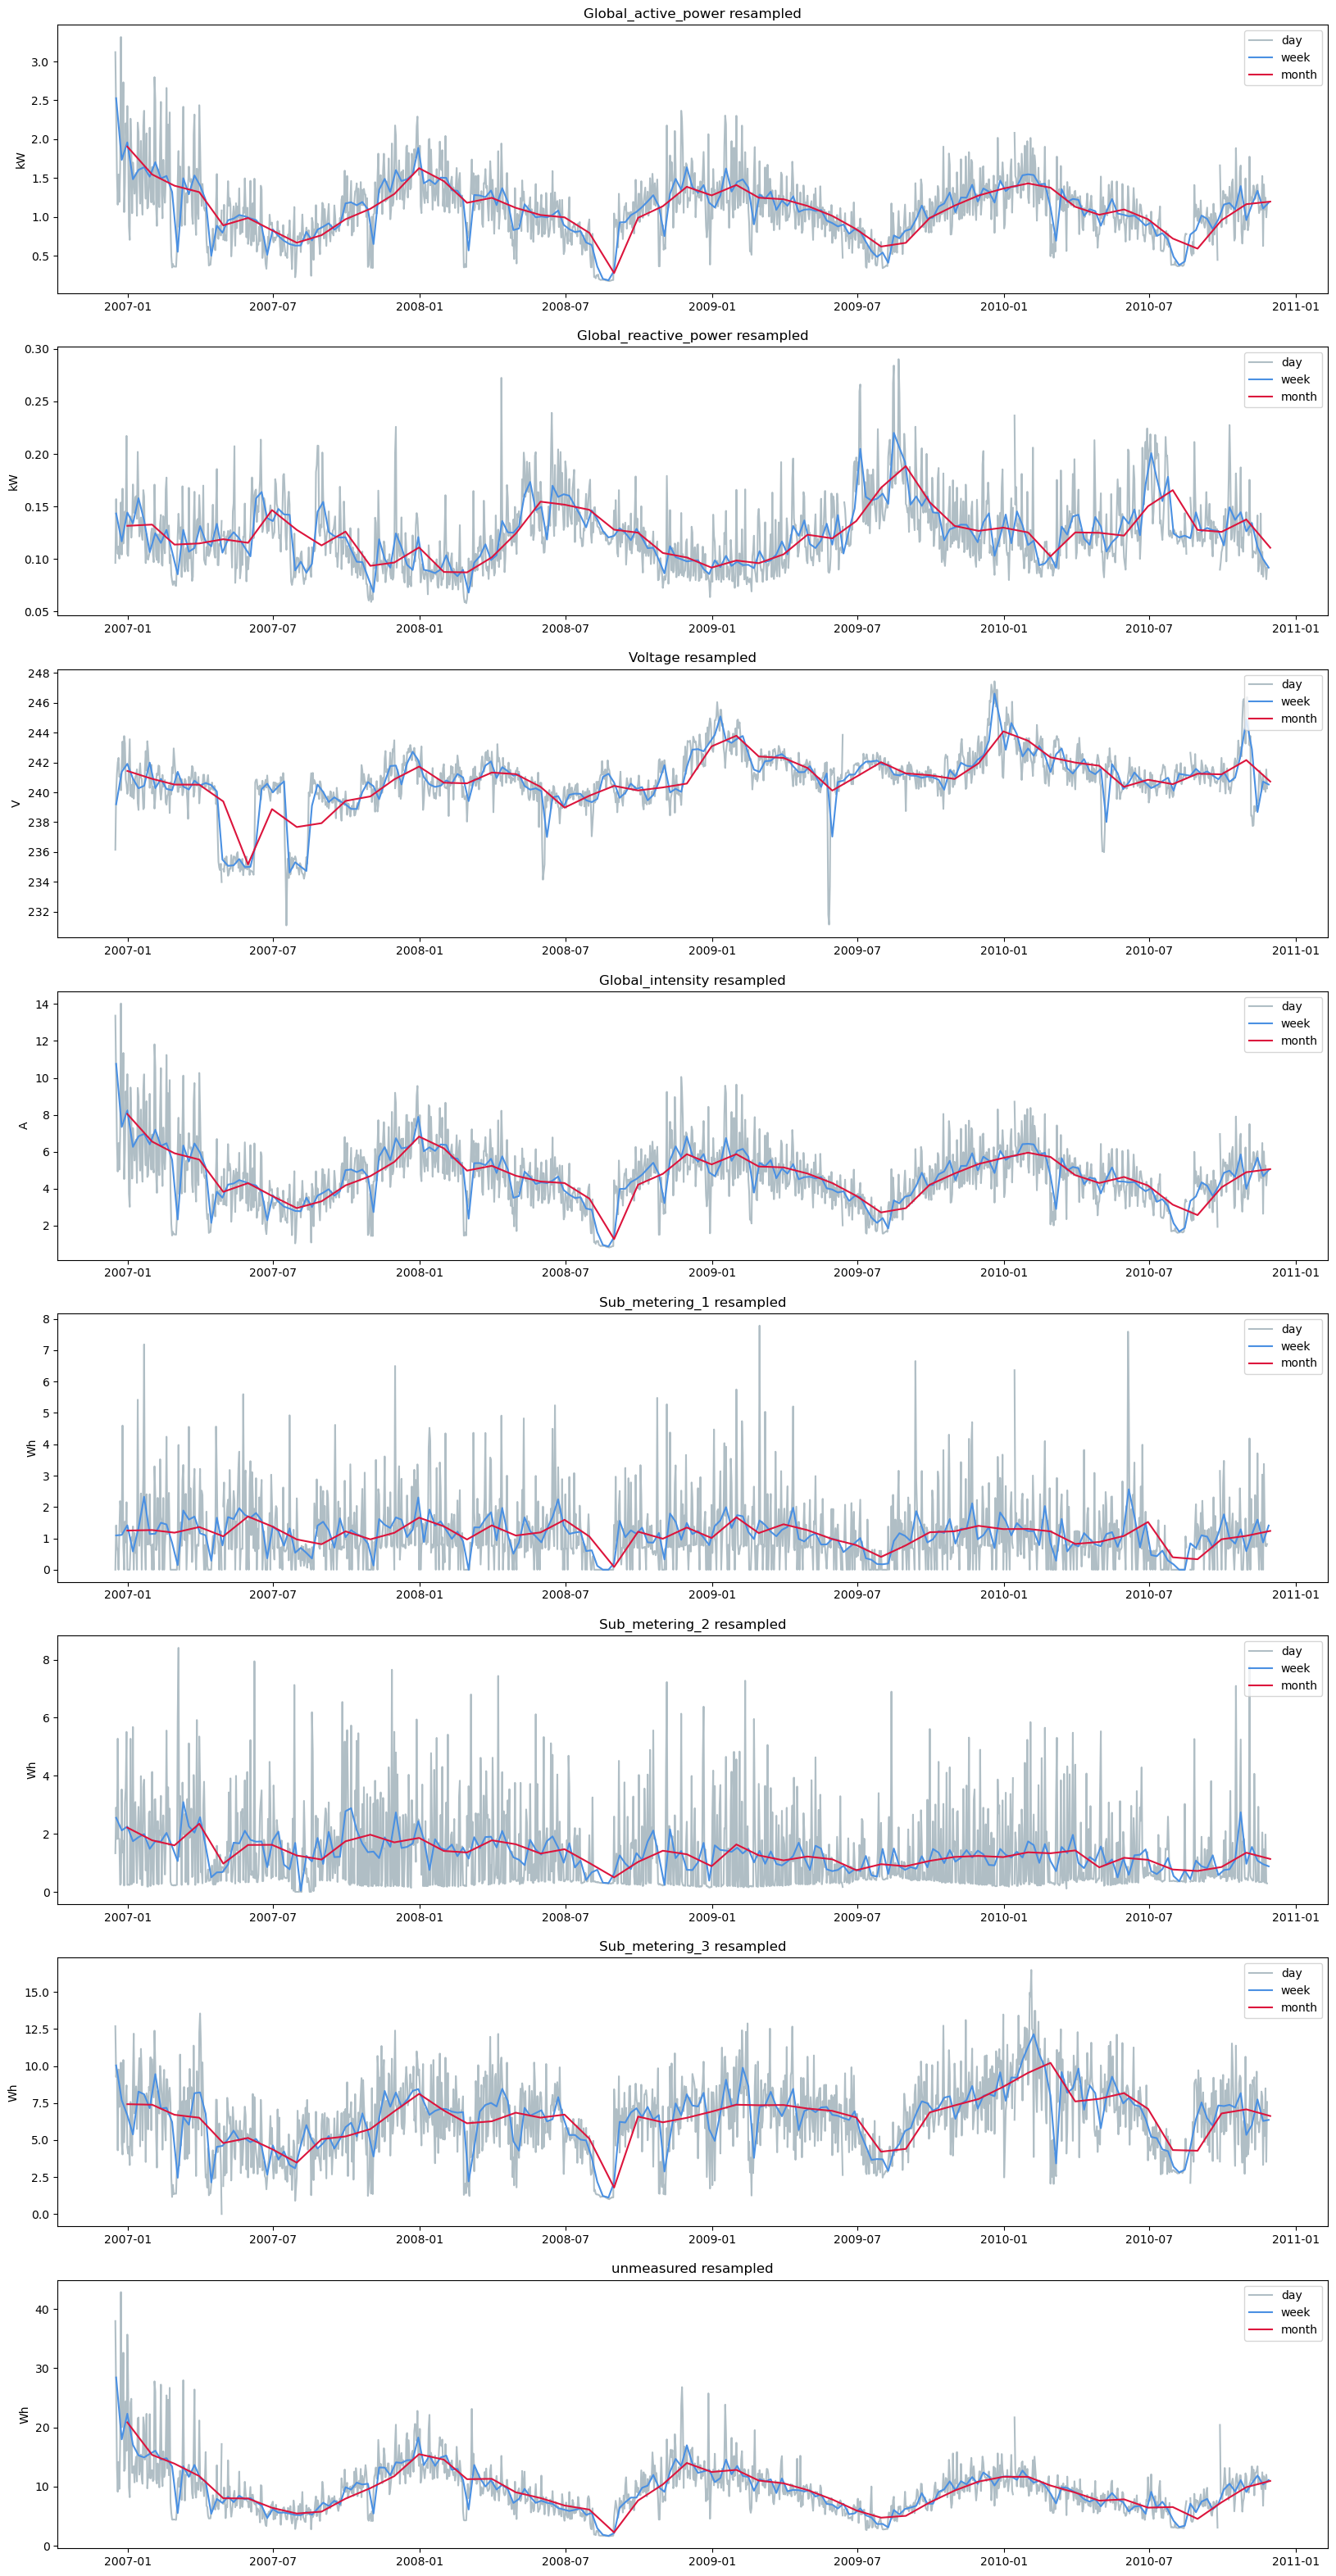

In [42]:
ylabeltext = ['kW', 'kW', 'V', 'A', 'Wh', 'Wh', 'Wh', 'Wh']
fig, ax = plt.subplots(nrows=len(ylabeltext), ncols=1, figsize=(20, 40))
axes = 0
for axes, column in enumerate(dataset.columns[:8]):
    ax[axes].plot(dtemp_rdm.index, dtemp_rdm[column], color='#B0BEC5', label="day")
    ax[axes].plot(dtemp_rwm.index, dtemp_rwm[column], color='#4A90E2', label="week")
    ax[axes].plot(dtemp_rmm.index, dtemp_rmm[column], color='#DC143C', label="month")
    ax[axes].set_title(f"{column} resampled")
    ax[axes].set_ylabel(ylabeltext[axes])
    ax[axes].legend(loc=1)

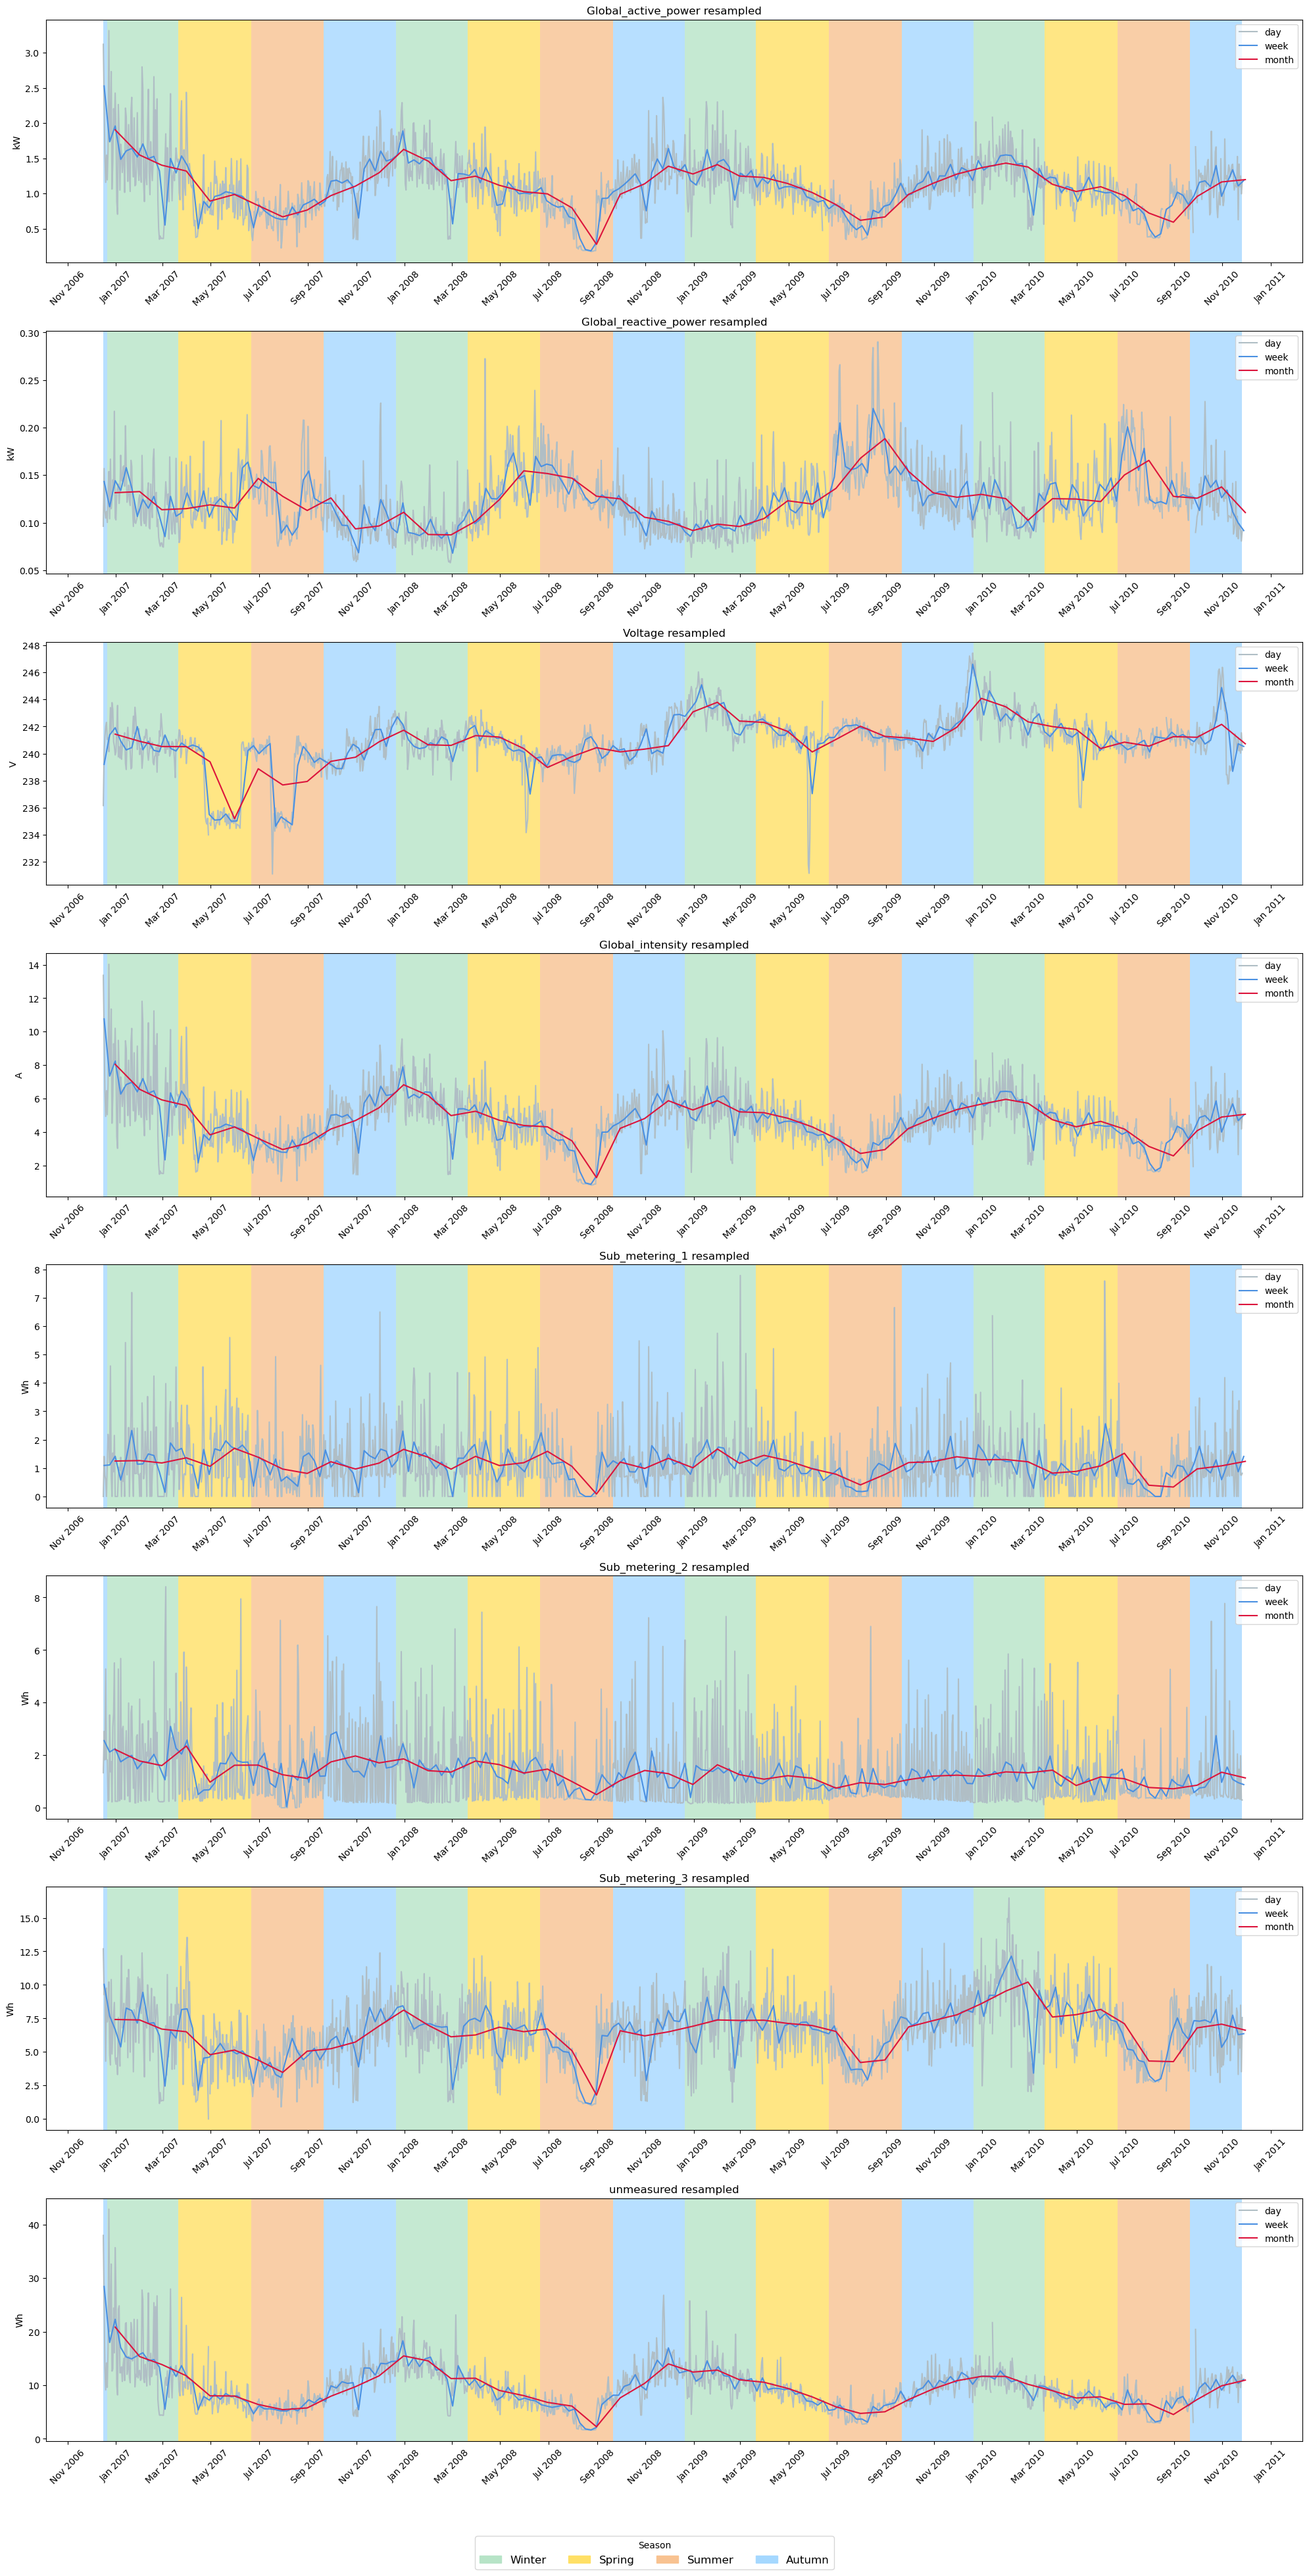

In [53]:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# Colores por estación
season_colors = {
    0: '#b7e4c7',
    1: '#ffe066',
    2: '#f8c291',
    3: '#a5d8ff'
}
# Colores por estación
season_names = {
    'Winter': '#b7e4c7',
    'Spring': '#ffe066',
    'Summer': '#f8c291',
    'Autumn': '#a5d8ff'
}

# Etiquetas de los ejes
ylabeltext = ['kW', 'kW', 'V', 'A', 'Wh', 'Wh', 'Wh', 'Wh']

# Crear subplots
fig, ax = plt.subplots(nrows=len(ylabeltext), ncols=1, figsize=(20, 40))

# Recorrer columnas y graficar
for axes, column in enumerate(dataset.columns[:8]):
    # Graficar series de tiempo
    ax[axes].plot(dtemp_rdm.index, dtemp_rdm[column], color='#B0BEC5', label="day")
    ax[axes].plot(dtemp_rwm.index, dtemp_rwm[column], color='#4A90E2', label="week")
    ax[axes].plot(dtemp_rmm.index, dtemp_rmm[column], color='#DC143C', label="month")
    
    # Sombrear por estación
    current_season = None
    start_date = None

    for date, season in zip(dtemp_rdm.index, dtemp_rdm['season']):
        if season != current_season:
            if current_season is not None:
                ax[axes].axvspan(start_date, date, facecolor=season_colors[current_season], alpha=0.8)
            start_date = date
            current_season = season
    ax[axes].axvspan(start_date, dtemp_rdm.index[-1], facecolor=season_colors[current_season], alpha=0.8)

    # Configuración del gráfico
    ax[axes].set_title(f"{column} resampled")
    ax[axes].set_ylabel(ylabeltext[axes])
    ax[axes].legend(loc=1)
    ax[axes].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax[axes].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax[axes].tick_params(axis='x', rotation=45)


# Añadir leyenda de estaciones fuera de los subplots
season_patches = [mpatches.Patch(color=color, label=season) for season, color in season_names.items()]
fig.legend(handles=season_patches, loc='lower center', ncol=4, fontsize=12, title="Season", bbox_to_anchor=(0.5, 0.02))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

